<a href="https://colab.research.google.com/github/freealise/freealise/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ffmpy
import IPython.display as display
from ffmpy import FFmpeg
ff = FFmpeg(
    inputs={'movie.mp4': None },
    outputs={'output.png': '-f apng -vf "chromakey=0xffffff:0.01:0.2"' }
)
ff.run()
ff = FFmpeg(
    inputs={'output.png': None},
    outputs={'output.gif': None}
)
ff.run()
video="output.gif"
display.display(display.Markdown(F"""![]({video})"""))

![](output.gif)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


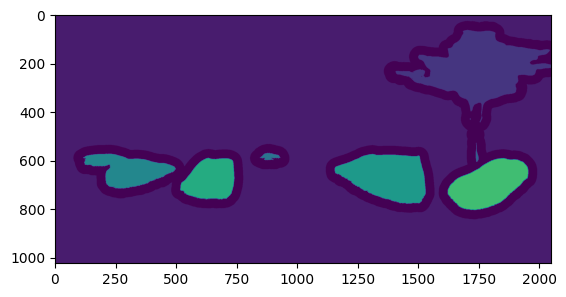

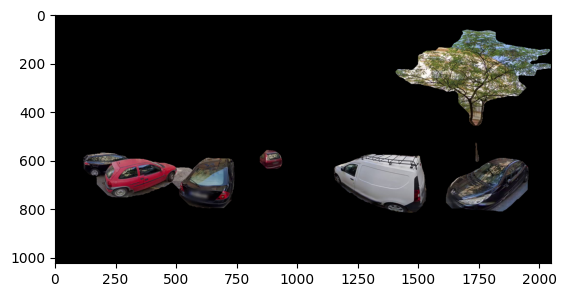

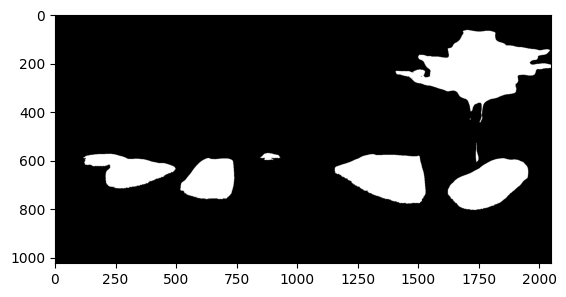

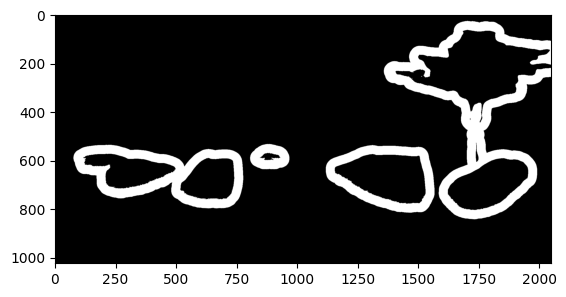

(<matplotlib.image.AxesImage at 0x7f52e93f5360>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('f0.jpg')
depth = cv.imread('f0_dmap.jpg')
gd = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
newmask = cv.cvtColor(depth, cv.COLOR_BGR2GRAY)
newmask[np.absolute(newmask.astype(np.int16)-gd.astype(np.int16))<16] = 0
ret,newmask = cv.threshold(newmask,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

b = 1
d = 36
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * b + 1, 2 * b + 1), (b, b))
bd = cv.erode(newmask, element)
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * d + 1, 2 * d + 1), (d, d))
bg = cv.dilate(newmask, element)
bg[bg.shape[0]-64:bg.shape[0],0:bg.shape[1]] = 0

mask = np.zeros(img.shape[:2],np.uint8)
# https://docs.opencv.org/4.x/d8/d83/tutorial_py_grabcut.html
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[bg == 255] = 3
mask[bd == 255] = 1 #2: probable bg, 3: probable fg

mask, bgdModel, fgdModel = cv.grabCut(depth, mask, None,None,None,15, cv.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

ret, markers = cv.connectedComponents(bd)
markers = markers+1
bg = cv.subtract(bg, bd)
markers[bg==255] = 0

img = img*mask[:,:,np.newaxis]

plt.imshow(markers), plt.show()
plt.imshow(img), plt.show()
plt.imshow(bd, 'gray'), plt.show()
plt.imshow(bg, 'gray'), plt.show()